 # Problema del Messo Viaggiatore (algoritmi genetici)

Si construisca un algoritmo genetico al fine di risolvere il problema del messo viaggiatore, ovvero minimizzare il percorso compiuto nel visitare N città in location arbitrarie, facendo poi ritorno alla prima.

Si sceglie arbitrariamente:
- N= 32 città;
- conformazione circolare delle città (per le quali è evidentemente noto il miglior percorso);
- conformazione casuale in un quadrato delle città;

Al fine di costruire l'algoritmo genetico, si suddivide lo stesso in parti sequenziali:
- generazione di una popolazione di cromosomi;
- ordinamento e selezione di due cromosomi genitori;
- processo di crossing per la generazione di due figli (a partire dai genitori);
- mutazione dei figli;
- composizione di una nuova generazione;

##### - generazione di una popolazione:
Nota la lunghezza N dei cromosomi, si definisce popolazione un'insime di $N^2$ cromosomi.\
Un cromosoma, inoltre, si definisce arbitrariamente come la stringa, in ordine secondo l'evoluzione dell'algoritmo, delle 32 città, ovvero [0,1,2,3,...,29,30,31].\
Conseguentemente ad ogni città nel cromosoma campione riportato è assegnata una coppia di coordinate, che serviranno per il calcolo delle distanze reciproche per minimizzare il percorso.

La prima generazione sarà dunque popolata in maniera del tutto arbitraria di cromosomi generati casualmente per rimescolamento di quello campione sopra riportato.

Per semplicità si terrà sempre fisso in tutto l'algoritmo genetico la città 0 nel primo posto di ogni singolo cromosoma coinvolto (ciò, inoltre, sarà fonte di controllo del buon funzionamento dell'algoritmo). 

##### - ordinamento e selezione dei cromosomi genitori:
Al fine di minimizzare il percorso del problema proposto è fondamentale definire una funzione obiettivo (o $Loss Function$) secondo cui valutare la bontà di ogni sequenza cromosomica per l'obiettivo del problema.

$$ L(\vec{x}_1, \dots, \vec{x}_{N-1}) = |\vec{x}_0-\vec{x}_1| + |\vec{x}_1-\vec{x}_2| + ... + |\vec{x}_{N-2}-\vec{x}_{n-1}| + |\vec{x}_{N-1}-\vec{x}_0| = \sum_{i=0}^{N-1}|\vec{x}_i-\vec{x}_{i+1}| + |\vec{x}_{N-1}-\vec{x}_0|$$
ovvero la somma di tutte le distanze tra le città (compreso il ritorno al punto originario) nel percorso desiderato, sarà la funzione che si decide arbitrariamente di utilizzare.

Odinare quindi una popolazione equivarrà a mettere in ordine tutti i cromosomi della popolazione secondo il valore di $L$ della configurazione racchiusa nella sequenza nei singoli cromosomi.

Posti quindi in cima alla popolazione i cromosomi che meglio soddisfano la minimizzazione di $L$, è possibile scegliere due cromosomi al fine di generare due figli per la generazione successiva.\
Sarà chiaramente più efficiente, per giungere al miglior cromosoma che minimizzi $L$, scegliere con maggior probabilità i cromosomi genitori che già meglio minimizzano $L$ nella attuale popolazione.\
Per far ciò, si sceglieranno i cromosomi genitori nella lista ordinata della popolazione al numero:

$$i= intero( N^2\times r^p )$$ 
dove $r$ è un valore casuale in $[0,1)$ e si sceglie $p$ arbitrariamente pari a 5. 

##### - crossing:
Avendo quindi evidenziato due cromosomi genitori si decide in maniera casuale di conservarne per entrambi una prima sezione (ad esempio i primi $a$ elementi), quindi di completare la sezione mancante (gli $N$-$a$-1 geni) del cromsoma con i geni assenti, nell'ordine in cui comparivano nel genitore opposto.

Si decide arbitrariamente che il processo di crossing avvenga il 70% delle volte; ciò significa che il 30% delle coppie cromosomiche genitoriali divengono figli senza alcuna modifica durante il cambio generazionale.

##### - mutazione dei figli:
I figli così ottenuti avranno quindi una possibilità (indipendentemente dal comportamento del fratello) inferiore al 10% di mutare, secondo 4 differenti tipi di mutazioni di seguito elencate:
1) scambio di due geni scelti casualmente in tutto il cromosoma (mantenendo fisso il gene 0 come primo del cromosoma);\
2) spostamento di un gruppo di m geni attigui di +n posizioni nel cromosoma;\
3) scambio di due gruppi di m geni attigui;\
4) inversione di un gruppo di m geni attigui;

Quest'ultima mutazione, qualora m sia pari a (N-1), ovvero vengano invertiti tutti i geni a parte il primo fisso a 0, risolverebbe, inoltre, una degenerazione del sistema proposto. Infatti, percorrere le città nel senso [0,1,2,...30,31] oppure nel senso [0,31,30,29,...,3,2,1] equivale al medesimo percorso in lunghezza, ma affrontato in due sensi diversi.

##### - composizione di una nuova popolazione:
Si definisce una nuova generazione, una popolazione di egual numero rispetto alla precedente ($N^2$), che sia composta interamente da cromosomi figli, ovvero da cromosomi che abbiano affrontato un processo (andato a buon fine o meno rispetto alla variazione della sequenza di geni) nell'ordine di selezione-crossing-mutazione.

Eseguire quindi un processo di selezione-crossing-mutazione un numero di volte necessarie a produrre $N^2$ figli.

Eseguire quindi una serie adeguata di generazioni al fine di osservare un percorso quanto più minimizzato possibile.

### - Circonferenza

Si considerino N città disposte su di una circonferenza di raggio pari a 1.
E' quindi evidente come, forzata questa configurazione, il miglior percorso possibile sia proprio, qualora si usassero infiniti punti di passaggio, la circonferenza; nel caso in esame quantomeno un andamento sequenziale dei punti su una traiettoria che abbozzi, secondo una spezzata, tale geometria. 

Si definisce arbitrariamente di utilizzare 200 generazioni.

Si produca allora:
- un grafico della lunghezza del miglior percorso stimato al variare del numero di generazioni;
- un grafico del valor medio della lunghezza dei percorsi stimati nella migliore metà della popolazione $\langle L \rangle_{bh}$ al variare delle generazioni;
- una visualizzazione del miglior percorso stimato all'ultima generazione indagata;

In [1]:

import numpy

Gen_c, FL_c, BHFL_c = numpy.loadtxt ( "FLoss_circonferenza.txt", usecols= (0,1,2), delimiter= "\t", 
                                       unpack= 'true' )
Cromo_c, X_c, Y_c= numpy.loadtxt ( "bestpath_circonferenza.txt", usecols= (0,1,2), delimiter= "\t", 
                                   unpack= 'true' )


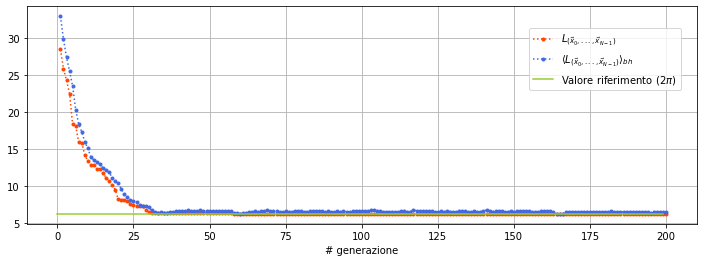

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot ( Gen_c, FL_c, marker= 'o', mfc= 'orangered', mec= 'orangered', ms= 3, linestyle= ":", 
           color= "orangered", label= r"$L_{ (\vec{x}_0,...,\vec{x}_{N-1})}$" )
plt.plot ( Gen_c, BHFL_c ,marker= 'o', mfc= 'royalblue', mec= 'royalblue', ms= 3, linestyle= ":", 
           color= "royalblue", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$' )
plt.plot ( 2*numpy.pi+numpy.zeros(numpy.size(Gen_c)), color= "yellowgreen", label= "Valore riferimento (2$\pi$)" )
plt.xlabel('# generazione')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


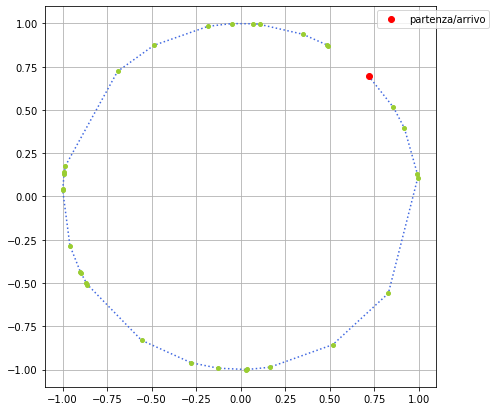

In [3]:

plt.figure(figsize=(7, 7))
plt.plot ( X_c, Y_c, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
           color= "royalblue" )
plt.plot ( X_c[0], Y_c[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
           label= "partenza/arrivo")
plt.xlabel('')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.85, 0.99), loc='upper left', borderaxespad=0.)

plt.show()


Dal materiale prodotto si può osservare come siano rispettate le descrizioni fatte in precedenza, il che pare dare consistenza e verificare l'efficacia dell'algoritmo implementato.

Si osservi come, evidentemente, il grafico del valor medio di $L_{bh}$ sia sempre superiore al grafico della migliore stima di $L$, ma tuttavia decresca in modo analogo nel numero di generazioni, a testimonianza che non solo il primo cromosoma varia al fine di minimizzare il percorso, ma l'intera popolazione divenga sempre più rappresentativa dell'obiettivo posto.

### - Quadrato

Si considerino N città disposte casualmente su un piano 2-dimensionale (per semplicità si limiti lo spazio ad un quadrato di lato 10) e si esegua l'algoritmo per un totale di circa 500 generazioni.

Si produca quindi:
- un grafico della lunghezza del miglior percorso stimato al variare del numero di generazioni;
- un grafico del valor medio della lunghezza dei percorsi stimati nella migliore metà della popolazione $\langle L \rangle_{bh}$ al variare delle generazioni;
- una visualizzazione del miglior percorso stimato all'ultima generazione indagata;

In [4]:

Gen_q, FL_q, BHFL_q = numpy.loadtxt ( "FLoss_quadrato.txt", usecols= (0,1,2), delimiter= "\t", unpack= 'true' )
Cromo_q, X_q, Y_q= numpy.loadtxt ( "bestpath_quadrato.txt", usecols= (0,1,2), delimiter= "\t", unpack= 'true' )


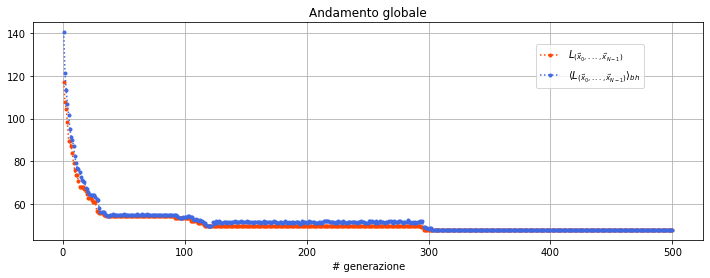

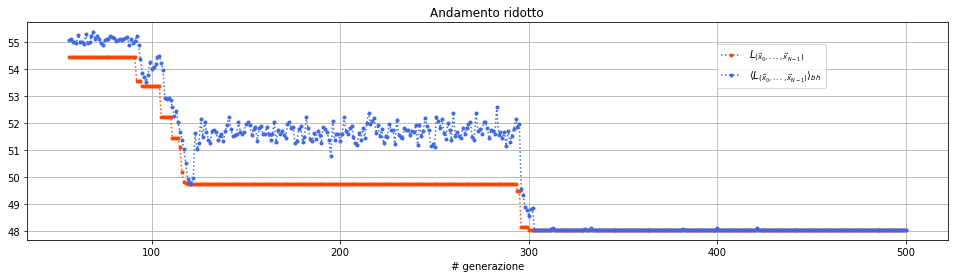

In [5]:

plt.figure(figsize=(12, 4))
plt.plot ( Gen_q, FL_q, marker= 'o', mfc= 'orangered', mec= 'orangered', ms= 3, linestyle= ":", 
           color= "orangered", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$' )
plt.plot ( Gen_q, BHFL_q, marker= 'o', mfc= 'royalblue', mec= 'royalblue', ms= 3, linestyle= ":", 
           color= "royalblue", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$')
plt.xlabel('# generazione')
plt.ylabel(r'')
plt.title( "Andamento globale" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)
plt.show()

plt.figure(figsize=(16.5, 4))
plt.plot ( Gen_q[55:], FL_q[55:] ,marker= 'o', mfc= 'orangered', mec= 'orangered', ms= 3, linestyle= ":", 
           color= "orangered", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$' )
plt.plot ( Gen_q[55:], BHFL_q[55:] ,marker= 'o', mfc= 'royalblue', mec= 'royalblue', ms= 3, linestyle= ":", 
           color= "royalblue", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$')
plt.xlabel('# generazione')
plt.ylabel(r'')
plt.title( "Andamento ridotto" )
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Dove si sono, inoltre, rimosse le prime 55 generazioni dal grafico al fine di meglio comprendere gli anadamenti su di una scala ridotta.

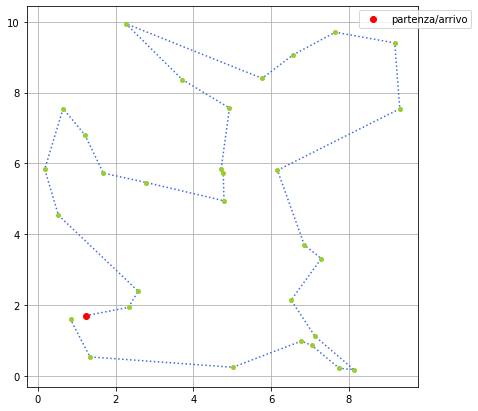

In [6]:

plt.figure(figsize=(7, 7))
plt.plot ( X_q, Y_q, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
           color= "royalblue" )
plt.plot ( X_q[0], Y_q[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
           label= "partenza/arrivo")
plt.xlabel('')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.85, 0.99), loc='upper left', borderaxespad=0.)

plt.show()


Non nota una configurazione palesemente migliore delle altre a priori, è quantomeno fondamentale che il percorso visualizzato non presenti intersezioni tra i collegamenti tra le diverse città.

Osservando, invece, l'andamento di $L$ e $\langle L_{bh} \rangle$, è visibile (soprattutto grazie al grafico ridotto) come opera il seguente algoritmo genetico.\
Esistono lunghi periodi di assestamento dell'algoritmo, spezzati in maniera netta da uno figlio (o una coppia di figli) che a seguito del crossing, o più probabilmente a seguito di una mutazione casuale, presentano un percorso migliore da proporre alle successive generazioni. Ciò implica che non è possibile considerare un andamento limite dell'algoritmo ed è necessario quindi decidere quando interromperlo in maniera arbitraria e a seconda delle risorse che si desidera impiegare; ciò impatta in maniera inevitabile sulla bontà del risultato ottenuto (qualora ci si fosse fermati a 200 generazioni si sarebbe osservato un percorso differente, da quello che si sarebbe potuto osservare a seguito di 1000 generazioni).